# Drive Mount

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
import os
os.chdir("gdrive/Shared drives/Large Scale Analytics")


In [0]:
%matplotlib inline
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, ImageColorGenerator
from nltk import FreqDist
#split Data
from sklearn.model_selection import train_test_split
#Spacy for "# Tokenization for the Clened Data"
import spacy
from tqdm import tqdm
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])
#CSR Matrix
from sklearn.feature_extraction.text import TfidfVectorizer
#pickel dump
import pickle



# Pickel Dataset read

In [0]:
df_happy_moment = pd.read_pickle("./df_happy_moment_11_15.pkl")
XTrain = pd.read_pickle("./XTrain_Cleaned_hm_11_15.pkl")
XTest = pd.read_pickle("./XTest_Cleaned_hm_11_15.pkl")
yTrain = pd.read_pickle("./yTrain_prediction_11_15.pkl")
yTest = pd.read_pickle("./yTest_prediction_11_15.pkl")
cv_train = pd.read_pickle("./cv_train_CSR_Matrix_11_15.pkl")
cv_test = pd.read_pickle("./cv_test_CSR_Matrix_11_15.pkl")

In [6]:
# print(XTrain.head())
# print(XTest.head(1))
# print(yTrain.head(1))
# print(yTest.head(1))
# cv_train[0,1649]
# print(cv_train[0,4185])
# print(cv_train)
# print(cv_test[20103,2059])
print("XTrain shape ", XTrain.shape)
print("yTrain shape ", yTrain.shape)
print("cv_train shape ", cv_train.shape)


XTrain shape  (80428, 1)
yTrain shape  (80428,)
cv_train shape  (80428, 5000)


# Histogram to See the Distribution of WordCount

In [7]:
#count of all the words in all the sentences line wise inside complete dataframe
word_count= df_happy_moment["cleaned_hm"].apply(lambda x : len(x.split()))
print(word_count[0:5])
print("Describe")
print(word_count.describe())

0    14
1    12
2    10
3    25
4    10
Name: cleaned_hm, dtype: int64
Describe
count    100535.000000
mean         18.298503
std          21.474146
min           2.000000
25%           9.000000
50%          14.000000
75%          21.000000
max        1179.000000
Name: cleaned_hm, dtype: float64


In [0]:
#creating bins of size "0-5" = "6"  and total Bins  = 11 starting insex from 0 -10 = 11 values
word_bins = ["0-5","6-10","11-15","16-20","21-25","26-30","31-35","36-40","41-45","46-50", ">=50"]

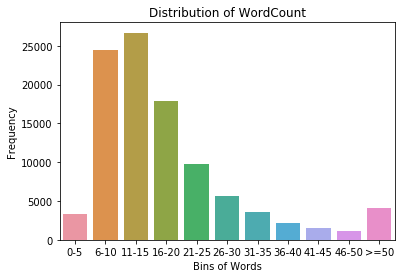

In [28]:
# bins_Category
# print(word_count.head(1))
word_bins_Category = word_count.apply(lambda x :  word_bins[min(10,int(x/5))])
# word_bins_Category.head()
# value_counts()
df_word_bins_Category= pd.DataFrame(word_bins_Category.value_counts().reset_index())
df_word_bins_Category.columns = ["Bins of Words", "Frequency"]
df_word_bins_Category

ax = sns.barplot(x="Bins of Words" , y="Frequency" , data=df_word_bins_Category, order=word_bins )
ax.set(title="Distribution of WordCount")
plt.show()
# How many words are used to describe Happy Moment 
#e.g there are 3323 people who have described their happy moment in less than 5 words.

# Finding Most Frequent Words "Before" and "After Text Cleaning"


In [0]:
#defined function for finding  frequent words
# function to plot top n most frequent words
def freq_words(x, terms,freq):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
  
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top n most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(10,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    if(freq==0):
      ax.set(title = "Before Text Cleaning: Most Frequent Words")
    else:
      ax.set(title = "After Text Cleaning: Most Frequent Words")
    plt.show()

Before Text Cleaning: Most Frequent Words


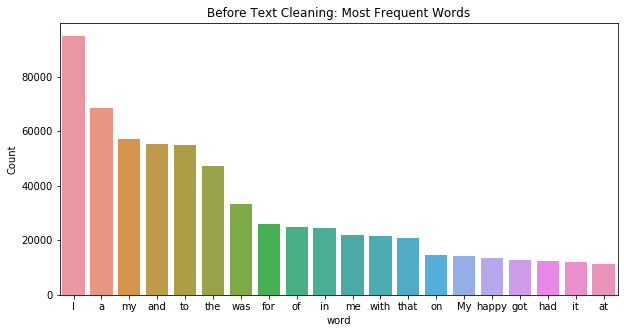

In [33]:
#Plotting graph for showing frequency wise words distribution 
# x = dataFrame, terms= 20 ,freq = 0[Before] 1[After]
print("Before Text Cleaning: Most Frequent Words")
freq_words(df_happy_moment["cleaned_hm"],20,0)

After Text Cleaning: Most Frequent Words


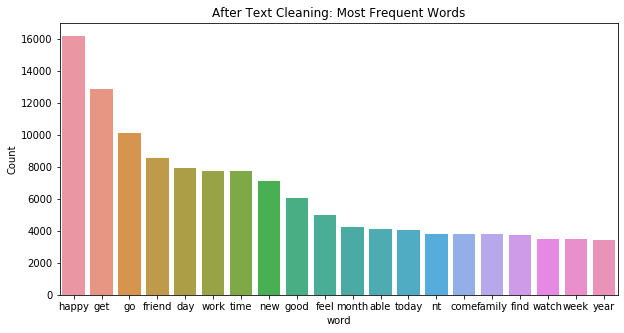

In [34]:
print("After Text Cleaning: Most Frequent Words")
freq_words(XTrain["cleaned_hm"],20,1)

# Word Cloud "Before" and "After" Cleaning  Text data with Noise Words

(-0.5, 3599.5, 2699.5, -0.5)

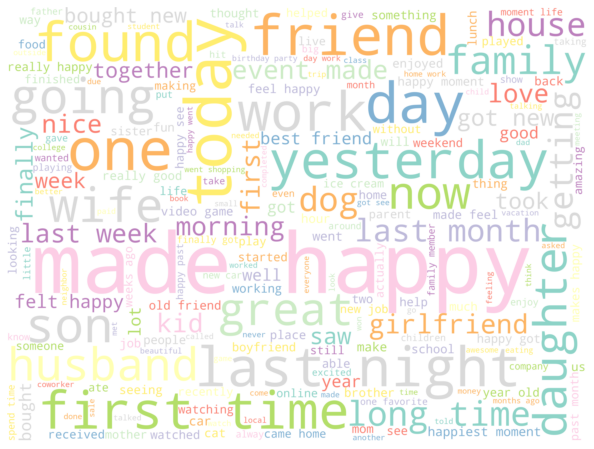

In [36]:
#creating a word cloud and It Ignores Stop words Bef

text = ' '.join(df_happy_moment['cleaned_hm'].tolist())
text = text.lower()

#code for genereating world cloud where we pass only string with aal the words
wordcloud = WordCloud(background_color="white", height=2700, width=3600).generate(text)
plt.figure( figsize=(14,8) )
plt.imshow(wordcloud.recolor(colormap=plt.get_cmap('Set3')), interpolation='bilinear')
plt.axis("off")

In [37]:
## Lets Remove some more Noise words
Noise_words = ['happy', 'day', 'got', 'went', 'today', 'made', 'one', 'two', 'time', 'last', 'first', 'going', 'getting', 'took', 'found', 'lot', 'really', 'saw', 'see', 'month', 'week', 'day', 'yesterday', 'year', 'ago', 'now', 'still', 'since', 'something', 'great', 'good', 'long', 'thing', 'toi', 'without', 'yesteri', '2s', 'toand', 'ing']
text[1:100]

' went on a successful date with someone i felt sympathy and connection with. i was happy when my so'

(-0.5, 3599.5, 2699.5, -0.5)

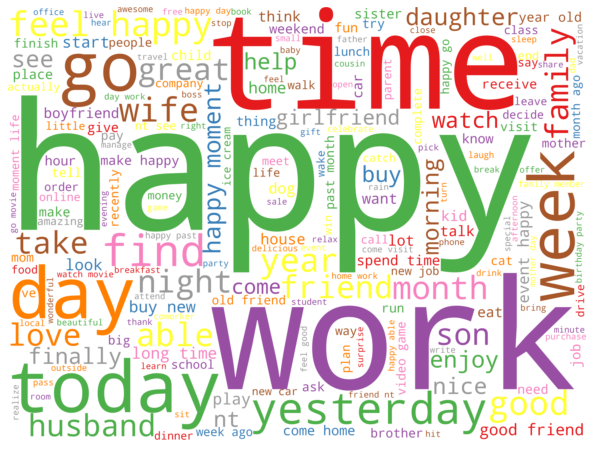

In [11]:
# World cloud after finishing preprocessing with removed StopWords
text1 = ' '.join(XTrain['cleaned_hm'].tolist())
text1 = text1.lower()
wordcloud = WordCloud(background_color="white", height=2700, width=3600).generate(text1)
plt.figure( figsize=(14,8) )
plt.imshow(wordcloud.recolor(colormap=plt.get_cmap('Set1')), interpolation='bilinear')
plt.axis("off")

# temp